In [75]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from wordcloud import WordCloud
import regex as re
import string 
from sklearn.metrics import classification_report,confusion_matrix

from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')

In [6]:
df_train = pd.read_csv('train_data_cleaning2.csv')
df_test = pd.read_csv('test_data_cleaning2.csv')

In [13]:
# extracting the number of examples of each class
Real_len = df_train[df_train['target'] == 1].shape[0]
Not_len = df_train[df_train['target'] == 0].shape[0]

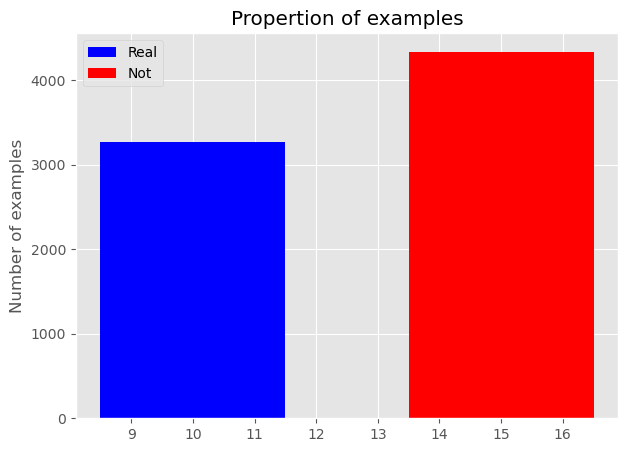

In [14]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Propertion of examples')
plt.show()

In [15]:
def length(text):    
    return len(text)

In [17]:
df_train['length'] = df_train['text'].apply(length) #this will calculate the length of the text for all
df_train['length']

0        71
1        40
2       139
3        67
4        92
       ... 
7608     61
7609    133
7610     55
7611    147
7612     76
Name: length, Length: 7613, dtype: int64

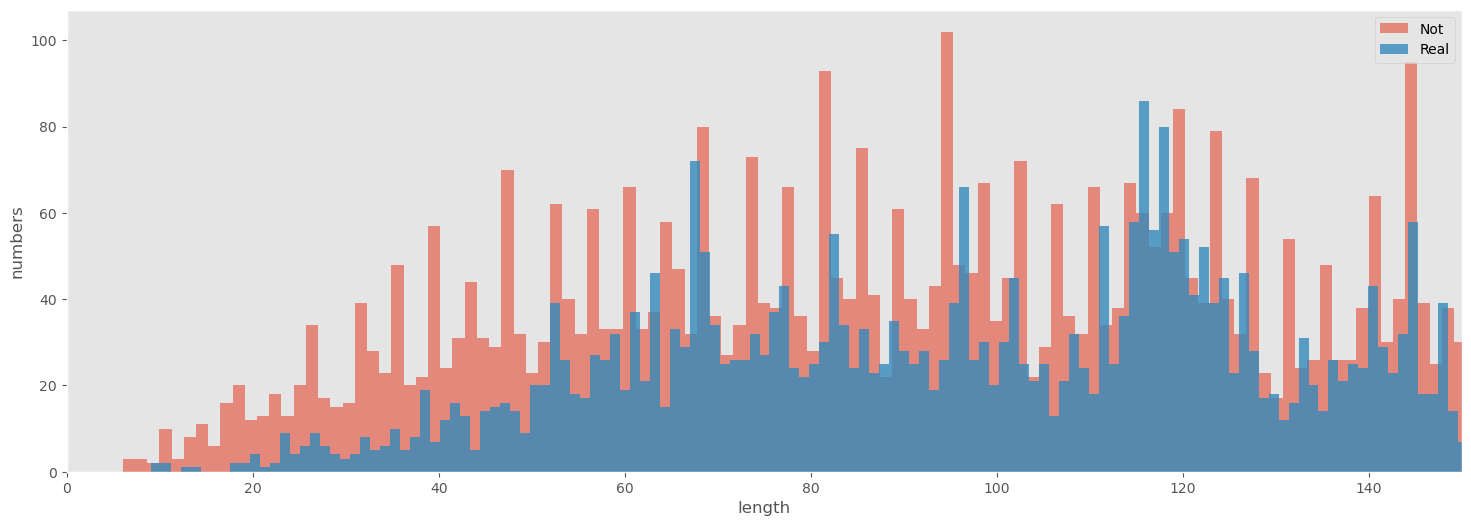

In [18]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df_train[df_train['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(df_train[df_train['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

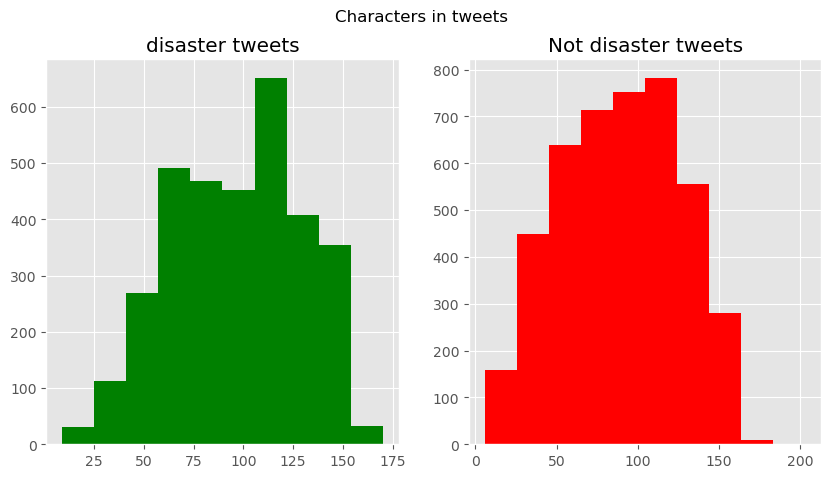

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df_train[df_train['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='green')
ax1.set_title('disaster tweets')
tweet_len=df_train[df_train['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

## Counting the number of Words in disaster and non disaster tweets

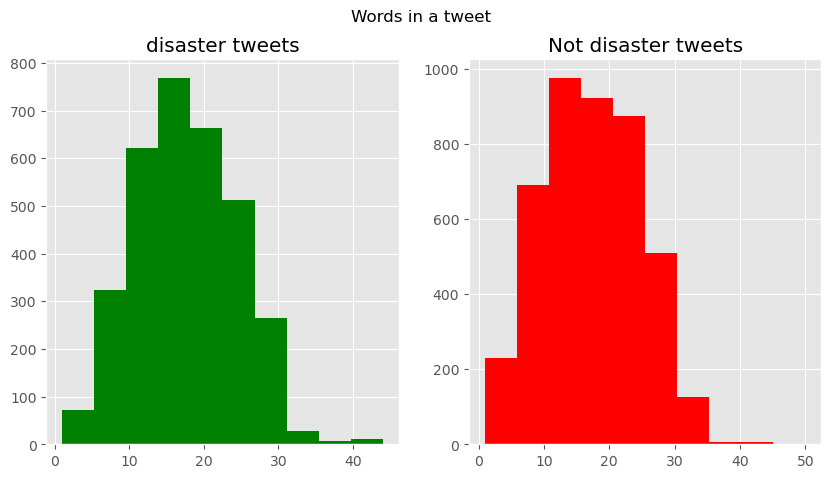

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df_train[df_train['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='green')
ax1.set_title('disaster tweets')
tweet_len=df_train[df_train['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

## Average word length in a tweet

Text(0.5, 0.98, 'Average word length in each tweet')

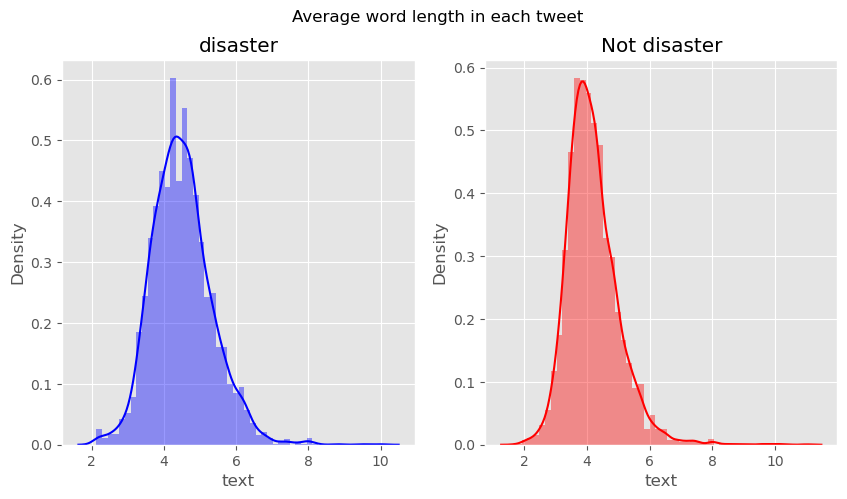

In [24]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_train[df_train['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('disaster')
word=df_train[df_train['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each tweet')

In [34]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')
stop_words = get_stop_words('english')

In [39]:
def create_corpus(target):
    corpus=[]
    
    for x in df_train[df_train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [40]:
def create_corpus_df(tweet, target):
    corpus=[]
    
    for x in df_train[df_train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [42]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

In [43]:
np.array(stop_words) #displaying all the stop words

array(['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am',
       'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because',
       'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by',
       "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do',
       'does', "doesn't", 'doing', "don't", 'down', 'during', 'each',
       'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't",
       'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her',
       'here', "here's", 'hers', 'herself', 'him', 'himself', 'his',
       'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in',
       'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's",
       'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor',
       'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought',
       'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't",
       'she', "she'd", "she'll", "she's", 'should', "shouldn't", '

<BarContainer object of 10 artists>

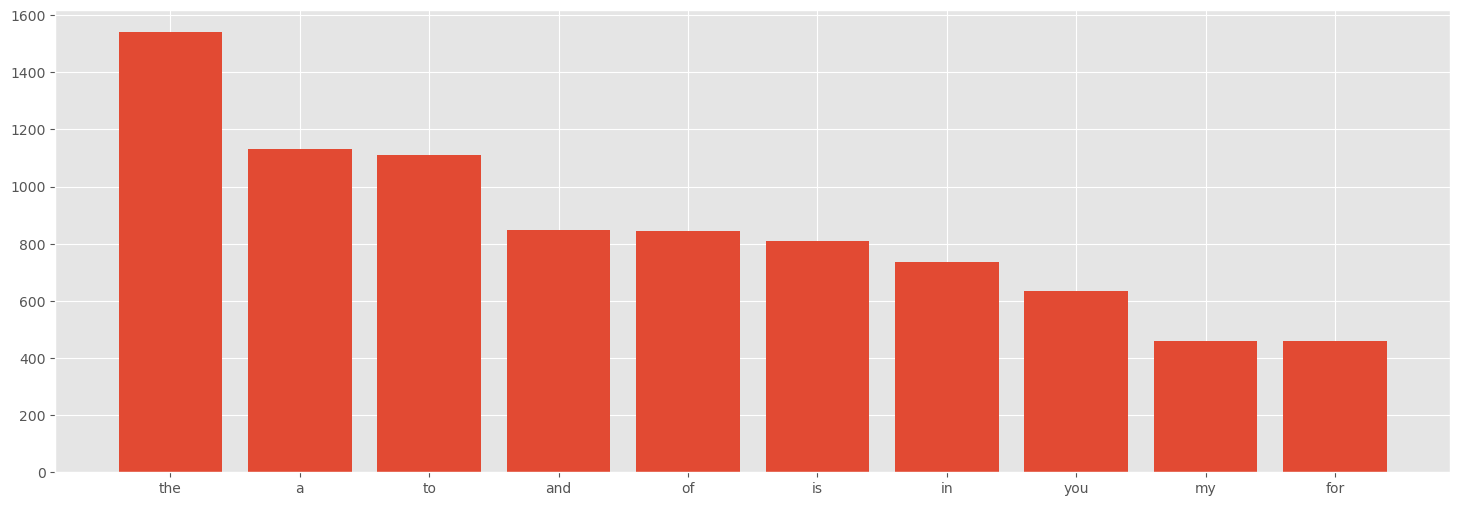

In [44]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 29 artists>

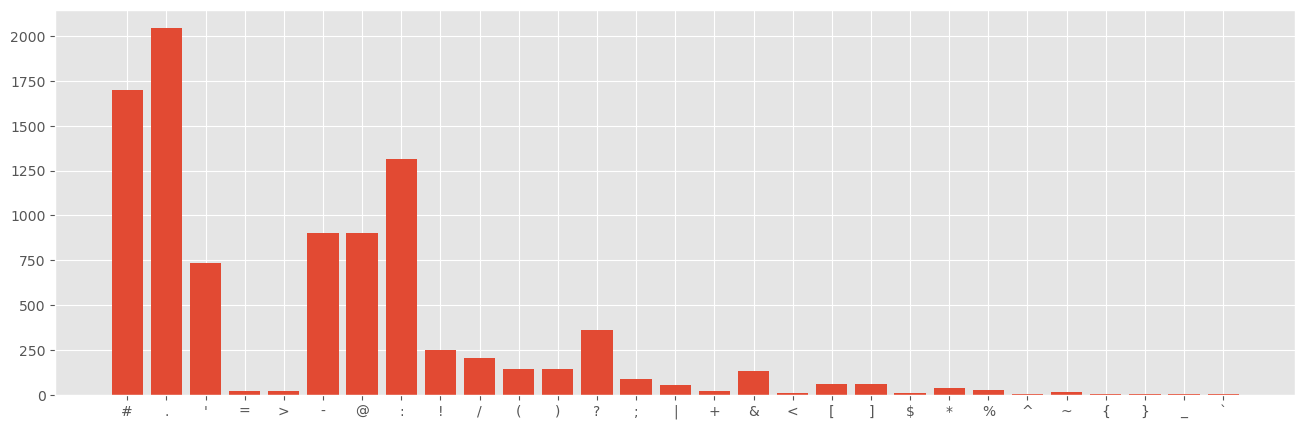

In [80]:
#puntuations count in disaster tweet
plt.figure(figsize=(16,5))
corpus=create_corpus(1)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 29 artists>

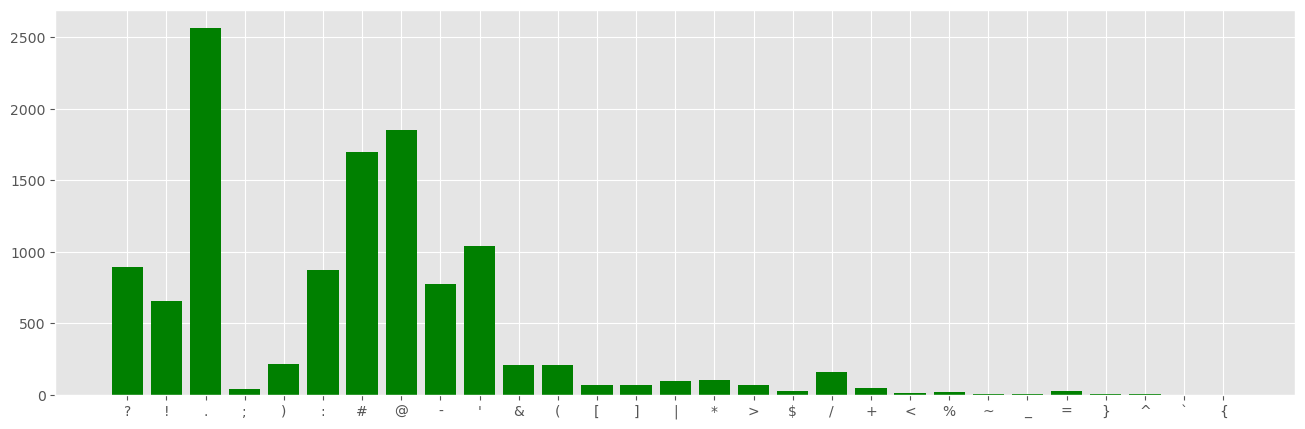

In [81]:
#puntuations count in non disaster tweer
plt.figure(figsize=(16,5))
corpus=create_corpus(0)
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

## Common words

In [50]:
plt.figure(figsize=(16,5))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop_words) :
        x.append(word)
        y.append(count)

<Figure size 1600x500 with 0 Axes>

<Axes: >

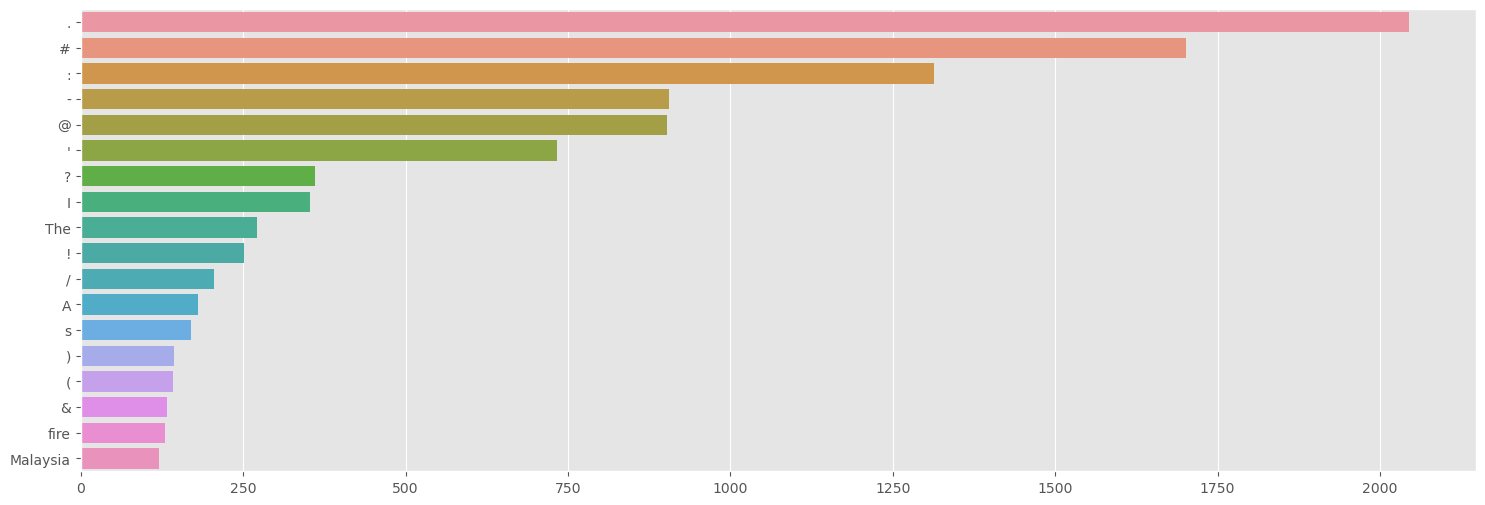

In [51]:
sns.barplot(x=y,y=x)

## N-gram analysis

In [56]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<Axes: >

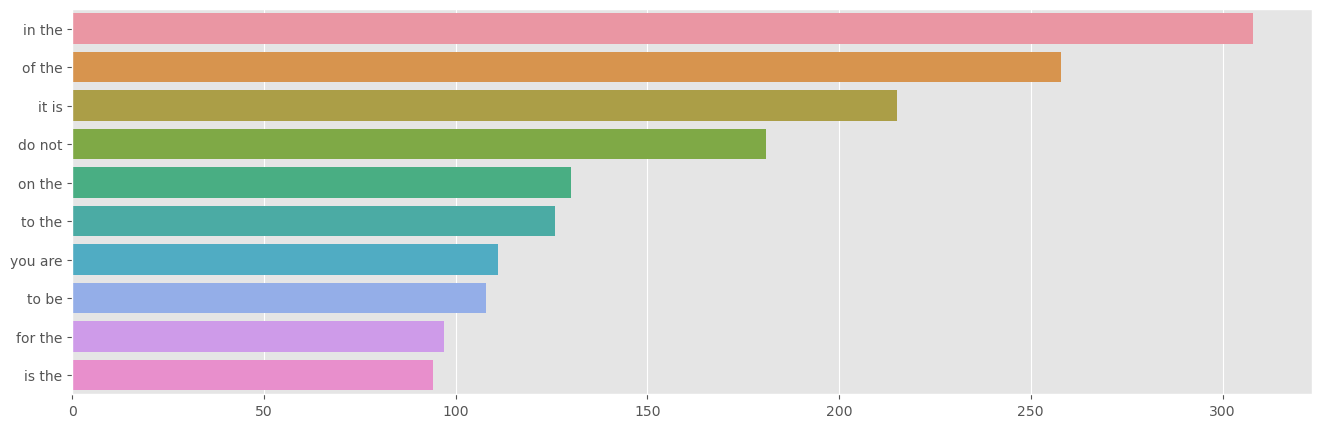

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
plt.figure(figsize=(16,5))
top_tweet_bigrams=get_top_tweet_bigrams(df_train['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

## DataCleaning for further Vizualization

In [61]:
df=pd.concat([df_train,df_test])
df.shape

(10876, 6)

In [62]:
#removing URL in the given data
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [66]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [67]:
#removing html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [68]:
df['text']=df['text'].apply(lambda x : remove_html(x))

In [70]:
#removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [71]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [76]:
#Removing Puntuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [77]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

## WordCloud

### Disaster

In [85]:
corpus_new1=create_corpus_df(df,1)
len(corpus_new1)

57608

In [86]:
corpus_new1[:10]

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#',
 'earthquake',
 'May']

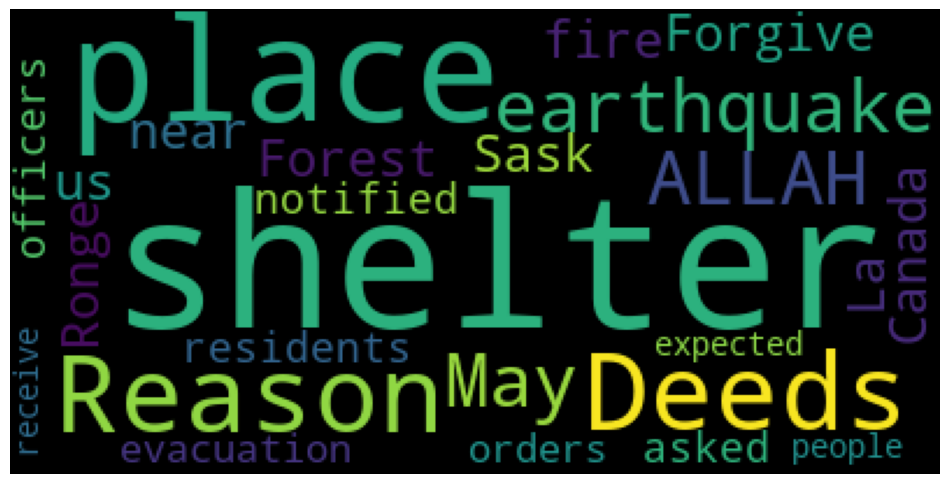

In [87]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new1[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Not disaster

In [88]:
corpus_new0=create_corpus_df(df,0)
len(corpus_new0)

74412

In [89]:
corpus_new0[:10]

['What', 'is', 'up', 'man', '?', 'I', 'love', 'fruits', 'Summer', 'is']

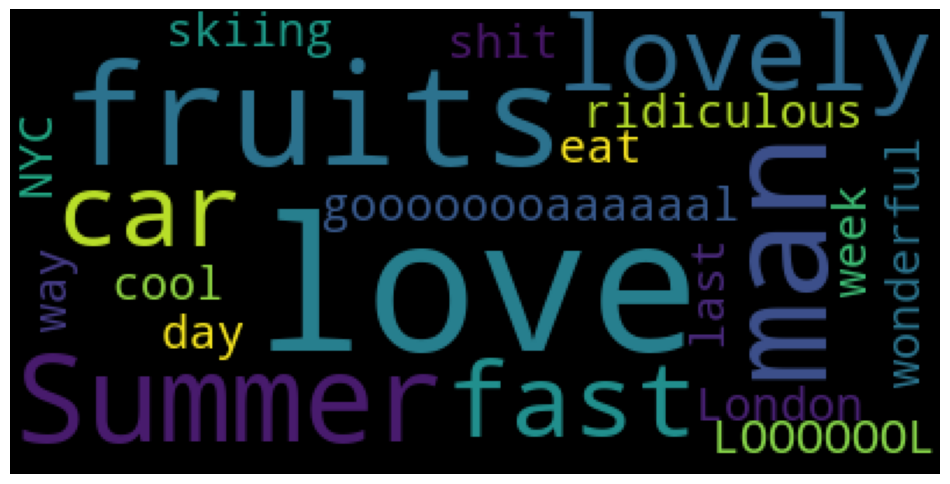

In [90]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(corpus_new0[:50]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()